In [ ]:
#LY-IT-14_MLDL_Lab_Exp-02
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ALL-SEM-07/ML-DL

[Errno 2] No such file or directory: '/content/drive/MyDrive/ALL-SEM-07/ML-DL'
/content


# **DATASET**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/diabetes2.csv")
df.head()

,pregnancy,glucose,bp,skinthickness,insulin,bmi,pedigreefunction,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df.label.values)

In [ ]:
X = df.drop(['label'], axis=1)

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# **BAGGING ALGORITHMS**

Decision Tree classifier, Naive Bayes, Random Forest

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[117  34]
 [ 25  55]]
ACCURACY SCORE:
0.7446
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.823944   0.617978  0.744589    0.720961      0.752613
recall       0.774834   0.687500  0.744589    0.731167      0.744589
f1-score     0.798635   0.650888  0.744589    0.724761      0.747467
support    151.000000  80.000000  0.744589  231.000000    231.000000


In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}
print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7445887445887446}}


In [ ]:
#DECISIONTREECLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

evaluate(tree, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[108  43]
 [ 28  52]]
ACCURACY SCORE:
0.6926
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.794118   0.547368  0.692641    0.670743      0.708663
recall       0.715232   0.650000  0.692641    0.682616      0.692641
f1-score     0.752613   0.594286  0.692641    0.673449      0.697781
support    151.000000  80.000000  0.692641  231.000000    231.000000


In [ ]:
scores['Traditional DT Classifier'] = {
        'Train': accuracy_score(y_train, tree.predict(X_train)),
        'Test': accuracy_score(y_test, tree.predict(X_test)),
    }

print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7445887445887446}, 'Traditional DT Classifier': {'Train': 1.0, 'Test': 0.6926406926406926}}


In [ ]:
#NAIVEBAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)

evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[302  47]
 [ 78 110]]
ACCURACY SCORE:
0.7672
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.794737    0.700637  0.767225    0.747687      0.761793
recall       0.865330    0.585106  0.767225    0.725218      0.767225
f1-score     0.828532    0.637681  0.767225    0.733107      0.761717
support    349.000000  188.000000  0.767225  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 27  53]]
ACCURACY SCORE:
0.7446
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.815068   0.623529  0.744589    0.719299      0.748735
recall       0.788079   0.662500  0.744589    0.725290      0.744589
f1-score     0.801347   0.642424  0.744589    0.721886      0.746309
support    151.000000  80.000000  0.744589  231.000000    231.000000


In [ ]:
scores['Traditional Naive Bayes Classifier'] = {
        'Train': accuracy_score(y_train, gnb.predict(X_train)),
        'Test': accuracy_score(y_test, gnb.predict(X_test)),
    }

print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7445887445887446}, 'Traditional DT Classifier': {'Train': 1.0, 'Test': 0.6926406926406926}, 'Traditional Naive Bayes Classifier': {'Train': 0.7672253258845437, 'Test': 0.7445887445887446}}


In [ ]:
#RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[122  29]
 [ 28  52]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.813333   0.641975  0.753247    0.727654      0.753989
recall       0.807947   0.650000  0.753247    0.728974      0.753247
f1-score     0.810631   0.645963  0.753247    0.728297      0.753603
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [ ]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }
print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7445887445887446}, 'Traditional DT Classifier': {'Train': 1.0, 'Test': 0.6926406926406926}, 'Traditional Naive Bayes Classifier': {'Train': 0.7672253258845437, 'Test': 0.7445887445887446}, 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533}, 'AdaBoost': {'Train': 0.8696461824953445, 'Test': 0.7142857142857143}, 'Gradient Boosting': {'Train': 0.9497206703910615, 'Test': 0.7489177489177489}, 'XG Boosting': {'Train': 0.9180633147113594, 'Test': 0.7489177489177489}}


# **BOOSTING ALGORITHMS**

adaboost, gradient boosting, xgboost

In [ ]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[322  27]
 [ 43 145]]
ACCURACY SCORE:
0.8696
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.882192    0.843023  0.869646    0.862608      0.868479
recall       0.922636    0.771277  0.869646    0.846956      0.869646
f1-score     0.901961    0.805556  0.869646    0.853758      0.868210
support    349.000000  188.000000  0.869646  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[120  31]
 [ 35  45]]
ACCURACY SCORE:
0.7143
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.774194   0.592105  0.714286    0.683149      0.711133
recall       0.794702   0.562500  0.714286    0.678601      0.714286
f1-score     0.784314   0.576923  0.714286    0.680618      0.712490
support    151.000000  80.000000  0.714286  231.000000    231.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }
print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7445887445887446}, 'Traditional DT Classifier': {'Train': 1.0, 'Test': 0.6926406926406926}, 'Traditional Naive Bayes Classifier': {'Train': 0.7672253258845437, 'Test': 0.7445887445887446}, 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533}, 'AdaBoost': {'Train': 0.8696461824953445, 'Test': 0.7142857142857143}}


In [ ]:
#gradientboostingclassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[344   5]
 [ 22 166]]
ACCURACY SCORE:
0.9497
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.939891    0.970760  0.949721    0.955325      0.950698
recall       0.985673    0.882979  0.949721    0.934326      0.949721
f1-score     0.962238    0.924791  0.949721    0.943514      0.949128
support    349.000000  188.000000  0.949721  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[120  31]
 [ 27  53]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816327   0.630952  0.748918    0.723639      0.752128
recall       0.794702   0.662500  0.748918    0.728601      0.748918
f1-score     0.805369   0.646341  0.748918    0.725855      0.750295
support    151.000000  80.000000  0.748918  231.000000    231.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }
print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7445887445887446}, 'Traditional DT Classifier': {'Train': 1.0, 'Test': 0.6926406926406926}, 'Traditional Naive Bayes Classifier': {'Train': 0.7672253258845437, 'Test': 0.7445887445887446}, 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533}, 'AdaBoost': {'Train': 0.8696461824953445, 'Test': 0.7142857142857143}, 'Gradient Boosting': {'Train': 0.9497206703910615, 'Test': 0.7489177489177489}}


In [ ]:
#xgboost

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[344   5]
 [ 22 166]]
ACCURACY SCORE:
0.9497
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.939891    0.970760  0.949721    0.955325      0.950698
recall       0.985673    0.882979  0.949721    0.934326      0.949721
f1-score     0.962238    0.924791  0.949721    0.943514      0.949128
support    349.000000  188.000000  0.949721  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[120  31]
 [ 27  53]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816327   0.630952  0.748918    0.723639      0.752128
recall       0.794702   0.662500  0.748918    0.728601      0.748918
f1-score     0.805369   0.646341  0.748918    0.725855      0.750295
support    151.000000  80.000000  0.748918  231.000000    231.000000


In [ ]:
scores['XG Boosting'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }
print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7445887445887446}, 'Traditional DT Classifier': {'Train': 1.0, 'Test': 0.6926406926406926}, 'Traditional Naive Bayes Classifier': {'Train': 0.7672253258845437, 'Test': 0.7445887445887446}, 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533}, 'AdaBoost': {'Train': 0.8696461824953445, 'Test': 0.7142857142857143}, 'Gradient Boosting': {'Train': 0.9497206703910615, 'Test': 0.7489177489177489}, 'XG Boosting': {'Train': 0.9180633147113594, 'Test': 0.7489177489177489}}


# **COMPARING MODELS**

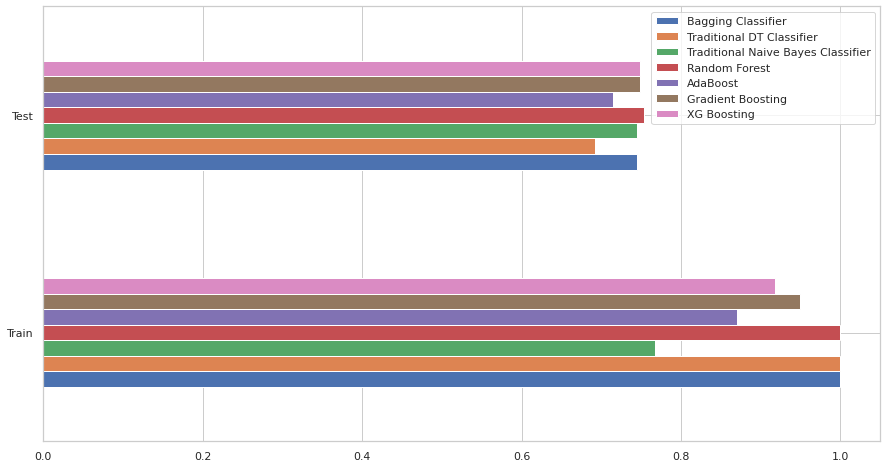

In [ ]:
scores_df = pd.DataFrame(scores)
scores_df.plot(kind='barh', figsize=(15, 8))